In [490]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [491]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

In [492]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [493]:
import seaborn as sns
sns.set(style="darkgrid")

In [494]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [495]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [496]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [578]:
input_pbs = pd.read_csv('notebook8-LDAFeature-thispbs.csv')

In [579]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1,inplace=True)
# input_pbs.drop('Unnamed: 1', axis=1, inplace=True)

In [580]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0,0.000000,0.000000,0.390909,0.000000,0.000000,0.000000,0.090266,0.000000,0.000000,0.000000,0.252755,0.210508
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0,0.000000,0.174502,0.000000,0.000000,0.000000,0.108335,0.000000,0.000000,0.000000,0.000000,0.642159,0.000000
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0,0.208703,0.013894,0.183520,0.013894,0.013894,0.013894,0.013894,0.013895,0.482727,0.013895,0.013894,0.013894
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1,0.260417,0.010419,0.010419,0.010419,0.010419,0.010419,0.135420,0.135354,0.010419,0.010419,0.010419,0.385459
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1,0.011907,0.154779,0.011907,0.154767,0.011907,0.011907,0.154622,0.297717,0.011907,0.011907,0.011907,0.154763


In [581]:
input_pbs.iloc[20]

headline              ทีมแพทย์เผยใช้ยากลุ่ม "เคตามีน" ช่วยทีมหมูป่าออกจากถ้ำหลวง   
date                  2019-05-04                                                   
DOW                   FRI                                                          
time                  11:23                                                        
view                  2577                                                         
category              ต่างประเทศ                                                   
tag                   ยาสลบ,เคตามีน,วารสารการแพทย์,ไทยพีบีเอส,ข่าวไทยพีบีเอส,หมูป่า
hour                  11                                                           
numTag                6                                                            
token                 ทีม,แพทย์,เผย,ยา,เคตามีน,ทีม,หมู,ป่า,ถ้ำหลวง                 
numToken              9                                                            
numChar               36                                                    

In [582]:
input_pbs['view'].describe()

count    2.753800e+04
mean     2.455730e+03
std      1.272891e+04
min      2.000000e+01
25%      2.530000e+02
50%      5.620000e+02
75%      1.559000e+03
max      1.208350e+06
Name: view, dtype: float64

In [583]:
IQRval = input_pbs['view'].describe().loc['75%']-input_pbs['view'].describe().loc['25%']

In [584]:
input_pbs['view'].describe().loc['25%']

253.0

In [585]:
outlierMin = max(input_pbs['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_pbs['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 3518.0


In [586]:
input_pbs = input_pbs[(input_pbs['view']<=outlierMax) & (input_pbs['view']>=outlierMin)]

In [587]:
# MINVIEW = input_pbs['view'].quantile(0.04)
# MAXVIEW = input_pbs['view'].quantile(0.96)

In [588]:
# MINVIEW=0

In [589]:
input_pbs = input_pbs[(input_pbs['view']<=MAXVIEW) & (input_pbs['view']>=MINVIEW)]

In [590]:
# input_pbs = input_pbs[input_pbs['year-month']< '2562-04' ]

In [591]:
MAXVIEW = input_pbs['view'].max()
MAXVIEW

3517

In [592]:
view_mean = input_pbs['view'].describe()['mean']
view_sd = input_pbs['view'].describe()['std']

In [593]:
input_pbs['view'].describe()

count    23042.000000
mean     793.924139  
std      762.645782  
min      94.000000   
25%      252.000000  
50%      489.000000  
75%      1058.000000 
max      3517.000000 
Name: view, dtype: float64

In [594]:
len(input_pbs)

23042

## Feature extraction

In [595]:
input_pbs_train, input_pbs_test = train_test_split(input_pbs, test_size=0.2,random_state=100)

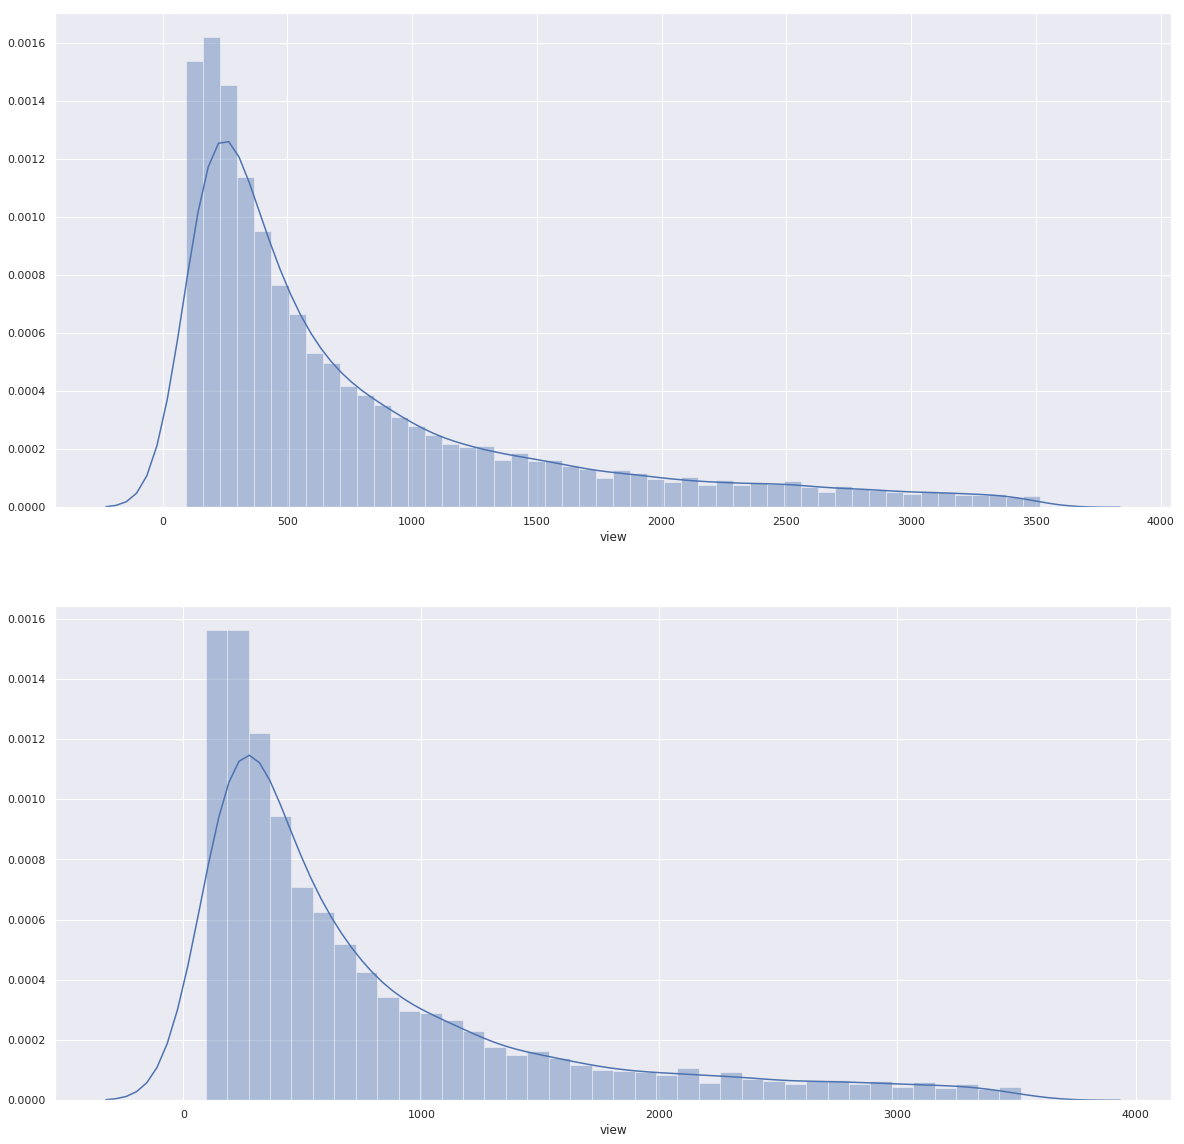

In [596]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_pbs_train['view'],ax=axarr[0])
sns.distplot(input_pbs_test['view'],ax=axarr[1])

## Bag of word feature

In [597]:
inputText_train = []
for sent in input_pbs_train['token']:
    inputText_train.append(sent.split(','))

In [598]:
inputText_test = []
for sent in input_pbs_test['token']:
    inputText_test.append(sent.split(','))

In [599]:
np.log(input_pbs_train['view']).describe()

count    18433.000000
mean     6.264955    
std      0.917329    
min      4.543295    
25%      5.529429    
50%      6.194405    
75%      6.975414    
max      8.165364    
Name: view, dtype: float64

In [600]:
MAXVIEW_log = np.log(input_pbs_train['view']).describe()['max']

In [601]:
MAXVIEW_log

8.165363632473982

In [602]:
MINVIEW_log = max(np.log(input_pbs_train['view']).describe()['min'],0)

In [603]:
MINVIEW_log

4.543294782270004

In [604]:
MEANVIEW_log = np.log(input_pbs_train['view']).describe()['mean']

In [605]:
diff_log = MAXVIEW_log-MINVIEW_log

In [606]:
view_mean

793.9241385296415

In [607]:
MINVIEW

94.0

In [653]:
inputLabel_train = []
for view in input_pbs_train['view']:
#     inputLabel_train.append((view-view_mean)/view_sd)
#     inputLabel_train.append((np.log(view)-MINVIEW_log)/diff_log)

    inputLabel_train.append(np.log(view+0.00001)/MAXVIEW_log)
#     inputLabel_train.append(view/MAXVIEW)

In [654]:
inputLabel_test = []
for view in input_pbs_test['view']:
#     inputLabel_test.append((view-view_mean)/view_sd)
#     inputLabel_test.append((np.log(view)-MINVIEW_log)/diff_log)
    inputLabel_test.append(np.log(view+0.00001)/MAXVIEW_log)

#     inputLabel_test.append(view/MAXVIEW)

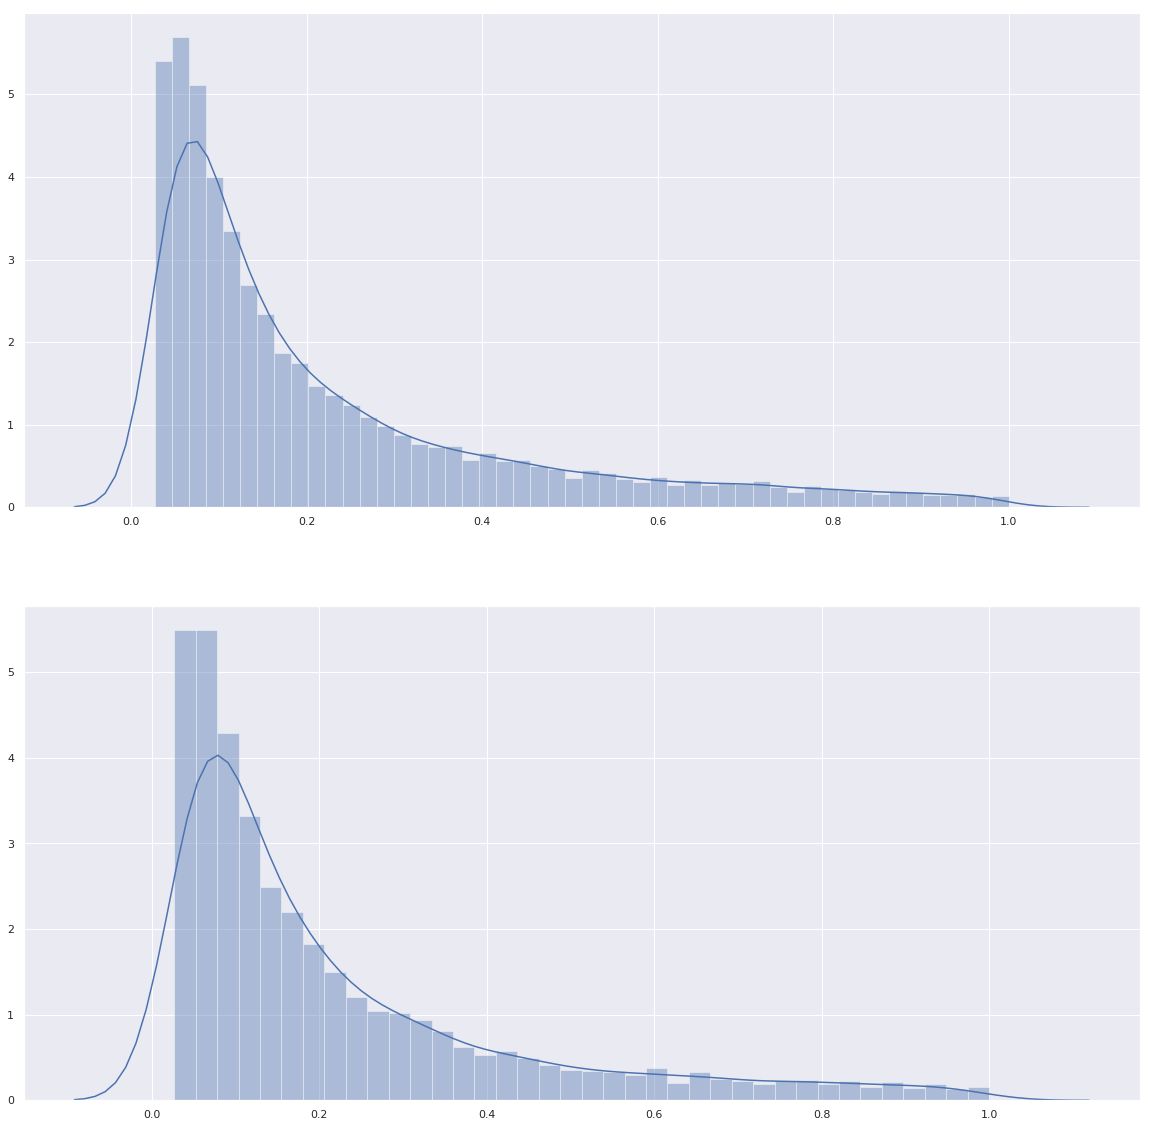

In [610]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train,ax=axarr[0])
sns.distplot(inputLabel_test,ax=axarr[1])

In [611]:
print(len(inputText_train),len(inputLabel_train))

18433 18433


In [612]:
print(len(inputText_test),len(inputLabel_test))

4609 4609


In [613]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//5]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [614]:
len(word_count)

3291

In [615]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [616]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [617]:
len(all_token)

3293

In [618]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [619]:
input_data_train = np.asarray(input_pbs_train['token'].str.split(','))
input_data_test = np.asarray(input_pbs_test['token'].str.split(','))

In [620]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [621]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [622]:
x_f1_train.shape

(18433, 3293)

## Numerical feature

In [623]:
input_pbs.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token',
       ...
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11'],
      dtype='object', length=101)

In [624]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0','Topic 1','Topic 2', 'Topic 3',
        'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
        'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','num_tag_worst',
#                      'tag_top_worst_sum', 'tag_top_worst_mean','numChar','num_location','sim_worst',
#                     'num_verb','num_noun','nverb_per_ntoken']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','sim_worst','numChar',
#                     'numTag','nnoun_per_ntoken','nverb_per_ntoken','numToken','num_noun','num_verb',
#                      'tag_top_worst_sum','num_neg','tag_top_worst_mean','num_person','num_classifier',
#                     'num_location','num_pos','num_tag_worst','num_organization']

In [625]:
len(numerical_feature)

58

In [626]:
cs = MinMaxScaler()

In [627]:
trainContinuous = cs.fit_transform(input_pbs_train[numerical_feature])
testContinuous = cs.fit_transform(input_pbs_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [628]:
trainContinuous.shape

(18433, 58)

## Categorial feature

In [629]:
categorial_feature = ['DOW', 'hour',
        'month', 'year',
        'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'is_pos',
       'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [630]:
len(categorial_feature)

34

In [631]:
lb = preprocessing.LabelBinarizer()

In [632]:
# zipBinarizer = lb.fit(input_pbs["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_pbs_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_pbs_test["DOW"])
# zipBinarizer = lb.fit(input_pbs["month"])
# trainCategorical_month = zipBinarizer.transform(input_pbs_train["month"])
# testCategorical_month = zipBinarizer.transform(input_pbs_test["month"])
# zipBinarizer = lb.fit(input_pbs["year"])
# trainCategorical_year = zipBinarizer.transform(input_pbs_train["year"])
# testCategorical_year = zipBinarizer.transform(input_pbs_test["year"])
# zipBinarizer = lb.fit(input_pbs["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_pbs_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_pbs_test["hour"])
# zipBinarizer = lb.fit(input_pbs["category"])
# trainCategorical_category = zipBinarizer.transform(input_pbs_train["category"])
# testCategorical_category = zipBinarizer.transform(input_pbs_test["category"])
# zipBinarizer = lb.fit(input_pbs["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_pbs_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_pbs_test["sentiment"])

## Concat feature

In [633]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
    zipBinarizer = lb.fit(input_pbs[f])
    trainCategorical = zipBinarizer.transform(input_pbs_train[f])
    testCategorical = zipBinarizer.transform(input_pbs_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(18433, 3351)


In [634]:
x_train = tmp_train
x_test = tmp_test

In [635]:
x_train.shape

(18433, 3425)

In [636]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [637]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [638]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [639]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [640]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [641]:
x_train.shape

(14746, 3425)

In [642]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (14746, 3425)
val size (3687, 3425)
test size (4609, 3425)


In [655]:
y_train = inputLabel_train
y_train = np.asarray(y_train).reshape(-1,1)
y_test = inputLabel_test
y_test = np.asarray(y_test).reshape(-1,1)

In [656]:
y_train, y_val = train_test_split(y_train, test_size=0.2,random_state=100)

In [657]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [658]:
print("train size",y_train.shape)
print("train size",y_val.shape)
print("test size",y_test.shape)

train size (14746, 1)
train size (3687, 1)
test size (4609, 1)


## Create Model

In [647]:
def create_model():
#     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
    input1 = Input(shape=(x_train.shape[1],))
#     x = LSTM(32)(input1)
#     x = Dense(256, activation='relu')(input1)
#     x = Dropout(0.3)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(128, activation='relu')(input1)
#     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(32, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(2048, activation='relu')(input1)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1,activation='linear')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=adam,  loss='mse')
    
    return model


In [648]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 3425)              0         
_________________________________________________________________
dense_130 (Dense)            (None, 2048)              7016448   
_________________________________________________________________
dropout_107 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_131 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dropout_108 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_132 (Dense)            (None, 256)               262400    
_________________________________________________________________
dropout_109 (Dropout)        (None, 256)               0         
__________

In [649]:
weight_path='./model_31.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [650]:
model.fit(x_train, y_train, 
          batch_size=32 ,epochs=100, verbose=1, validation_data=[x_val,y_val],callbacks=callbacks_list)

Train on 14746 samples, validate on 3687 samples
Epoch 1/100
14746/14746 [==============================] - 11s 743us/step - loss: 0.0526 - val_loss: 0.0522

Epoch 00001: val_loss improved from inf to 0.05225, saving model to ./model_31.h5
Epoch 2/100
14746/14746 [==============================] - 8s 542us/step - loss: 0.0462 - val_loss: 0.0453

Epoch 00002: val_loss improved from 0.05225 to 0.04530, saving model to ./model_31.h5
Epoch 3/100
14746/14746 [==============================] - 8s 544us/step - loss: 0.0427 - val_loss: 0.0449

Epoch 00003: val_loss improved from 0.04530 to 0.04487, saving model to ./model_31.h5
Epoch 4/100
14746/14746 [==============================] - 8s 544us/step - loss: 0.0388 - val_loss: 0.0448

Epoch 00004: val_loss improved from 0.04487 to 0.04480, saving model to ./model_31.h5
Epoch 5/100
14746/14746 [==============================] - 8s 544us/step - loss: 0.0348 - val_loss: 0.0460

Epoch 00005: val_loss did not improve from 0.04480
Epoch 6/100
14746/1

KeyboardInterrupt: 

In [659]:
weight_model='./model_30.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3425)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 2048)              7016448   
_________________________________________________________________
dropout_112 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_137 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dropout_113 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_138 (Dense)            (None, 256)               262400    
_________________________________________________________________
dropout_114 (Dropout)        (None, 256)               0         
__________

## Evaluate Model

In [571]:
y_pred = model.predict(x_test)

In [122]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 0.10517481414570291
rmse : 0.324306666822782
mae : 0.0843877103704456


In [123]:
np.exp(y_pred*MAXVIEW_log).shape

(5068, 1)

In [81]:
mse = np.sqrt(mean_squared_error((y_pred*view_sd)+view_mean, (y_test*view_sd)+view_mean))
rmse = np.sqrt(mse)
mae = mean_absolute_error((y_pred*view_sd)+view_mean,(y_test*view_sd)+view_mean)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 212.0802699963063
rmse : 14.562976000677413
mae : 169.42435599370893


In [125]:
MAXVIEW_log

9.310095205113175

In [660]:
mse = mean_squared_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred*MAXVIEW_log), np.exp(y_test*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 567639.1995882734
rmse : 753.4183430128799
mae : 467.16642669669216


In [78]:
mse = np.sqrt(mean_squared_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log)))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp((y_pred*diff_log)+MINVIEW_log), np.exp((y_test*diff_log)+MINVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 2104.422835193213
rmse : 45.87398865580813
mae : 1409.7671867874697


In [79]:
mse = np.sqrt(mean_squared_error(np.y_pred*MAXVIEW, y_test*MAXVIEW))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred*MAXVIEW, y_test*MAXVIEW)
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 1320.231879676309
rmse : 36.334995248056785
mae : 1054.692356838618


In [364]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_train),y_train )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

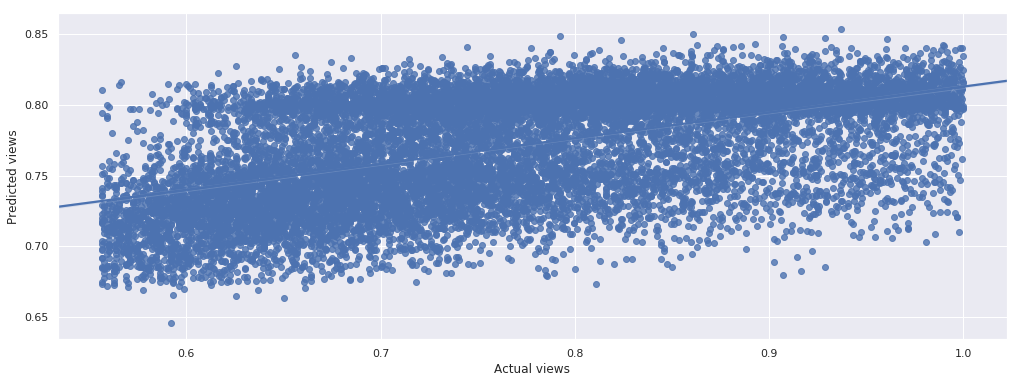

In [365]:
f, ax = plt.subplots(figsize=(17,6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


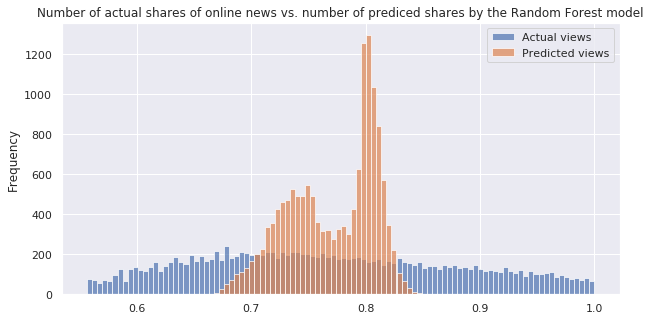

In [366]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [661]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model.predict(x_test),y_test )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [664]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

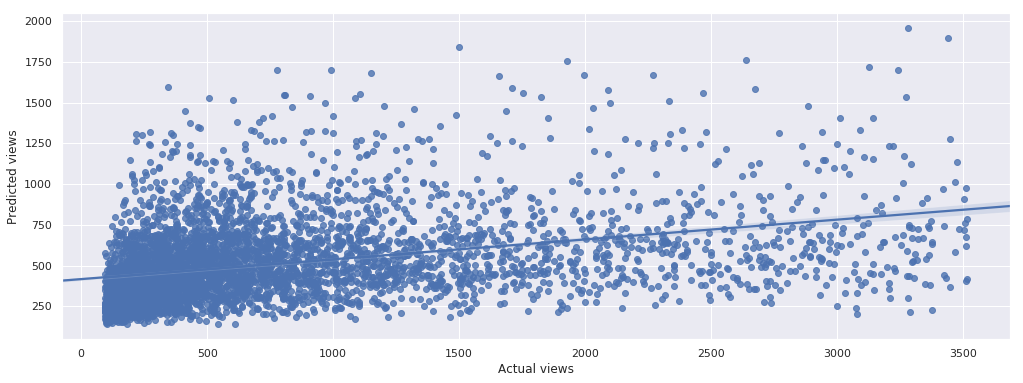

In [663]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log), y=np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log))
sns.plt.show()

In [577]:
MAXVIEW_log

8.165363632473982

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


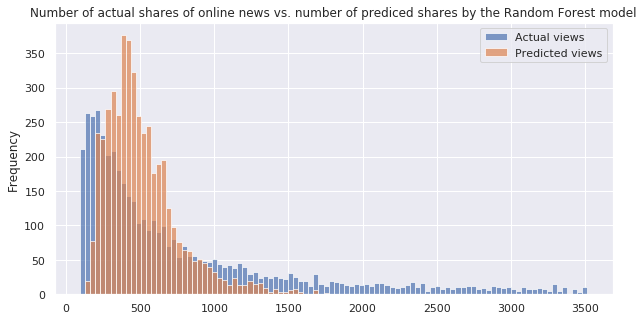

In [665]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [666]:
MAXVIEW

3517

In [671]:
from sklearn.metrics import r2_score

r2_score( np.exp(y_test*MAXVIEW_log), np.exp(y_pred*MAXVIEW_log))

0.005220260378779984

In [281]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp((y_test[i]*diff_log)+MINVIEW_log),np.exp((y_pred[i]*diff_log)+MINVIEW_log))

[32.58852662] [26.683107]
[61.69388728] [57.003967]
[22.6266326] [44.10033]
[67.97336833] [38.13454]
[27.53149448] [23.504541]
[20.56067932] [25.230734]
[20.56067932] [22.433186]
[33.34286953] [35.944588]
[21.92362254] [18.41748]
[17.36280014] [21.495384]
[19.85150634] [19.551714]
[81.14226595] [27.539337]
[77.75824307] [34.574886]
[50.49108737] [35.238964]
[41.35378164] [23.992352]
[24.72496323] [26.475117]
[22.53390979] [32.154125]
[51.460011] [26.53703]
[32.86442964] [26.476954]
[18.31390873] [21.711073]
[28.77581633] [28.00306]
[19.74854374] [26.740978]
[61.23482991] [44.989964]
[56.9942846] [26.51107]
[26.52726938] [27.987988]
[74.80720388] [61.131138]
[24.5519761] [28.628952]
[26.44562193] [31.246397]
[49.85326105] [45.161514]
[41.29651201] [54.307602]
[54.39851023] [34.57528]
[32.4498746] [26.446053]
[23.80565499] [23.12685]
[21.15336747] [23.963053]
[46.8983155] [36.9036]
[25.82673002] [23.005583]
[44.70876455] [28.096043]
[42.73769324] [46.057648]
[41.26785343] [20.729435]
[32

In [282]:
for i in range(0,50):
#     print(y_test[i],y_pred[i])
    print(np.exp(y_pred[i]*MAXVIEW_log),np.exp(y_test[i]*MAXVIEW_log))

[365.83087] [524.00001]
[1431.4364] [1650.00001]
[902.49866] [272.00001]
[695.02295] [1964.00001]
[291.2597] [387.00001]
[330.8231] [229.00001]
[267.83475] [229.00001]
[624.9384] [546.00001]
[187.89471] [257.00001]
[248.04813] [169.00001]
[209.19972] [215.00001]
[387.198] [2700.00001]
[582.79114] [2501.00001]
[603.06256] [1151.00001]
[302.2133] [804.00001]
[360.72174] [319.00001]
[511.51318] [270.00001]
[362.23926] [1191.00001]
[360.76678] [532.00001]
[252.53923] [186.00001]
[398.9942] [419.00001]
[367.25797] [213.00001]
[935.4817] [1628.00001]
[361.6026] [1431.00001]
[398.60837] [362.00001]
[1623.0474] [2333.00001]
[415.1642] [315.00001]
[485.85315] [360.00001]
[941.9025] [1125.00001]
[1312.0494] [802.00001]
[582.8031] [1316.00001]
[360.0105] [520.00001]
[282.90228] [298.00001]
[301.5504] [241.00001]
[655.2225] [1008.00001]
[280.24173] [345.00001]
[401.37836] [925.00001]
[975.75836] [853.00001]
[232.38893] [801.00001]
[920.6873] [511.00001]
[577.30035] [1695.00001]
[224.96858] [164.00

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ImportError: Traceback (most recent call last):
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/burin/py_36_env/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/burin/py_36_env/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.